In [19]:
import pandas as pd
import numpy as np
from statsmodels.stats import proportion

In [2]:
data = pd.read_excel('dataset_hw9.xlsx')

In [3]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [18]:
data.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [6]:
data.userid.count()

90189

In [7]:
data.userid.nunique()

90189

> Количество уникальных айдишников пользователей совпадает с общим количеством записей в данных, это означает что у нас нет дубликатов (например, одних и тех же пользователей в тестовой и контрольной группе).

In [8]:
data.retention_1.unique(), data.retention_7.unique()

(array([0, 1]), array([0, 1]))

In [9]:
data.sum_gamerounds.min(), data.sum_gamerounds.max()

(0, 49854)

In [10]:
data.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

> Данные чистые, в колонках содержатся только ожидаемые значения, можно продолжать анализ.

In [15]:
group_a = data.query('version == "gate_30"')
group_b = data.query('version == "gate_40"')
n_a = group_a.shape[0]
n_b = group_b.shape[0]
n_a, n_b

(44700, 45489)

> Выборки примерно одинаковые, в тесте на 789 игроков больше.

In [13]:
a_1 = group_a.retention_1.sum()
b_1 = group_b.retention_1.sum()
a_1, b_1

(20034, 20119)

In [14]:
a_7 = group_a.retention_7.sum()
b_7 = group_b.retention_7.sum()
a_7, b_7

(8502, 8279)

In [16]:
round(a_1 / n_a * 100, 2), round(b_1 / n_b * 100, 2)

(44.82, 44.23)

In [17]:
round(a_7 / n_a * 100, 2), round(b_7 / n_b * 100, 2)

(19.02, 18.2)

> Процент удержания в тестовой группе меньше чем в контроле и после 1го дня и после 7 дней проведения теста. 

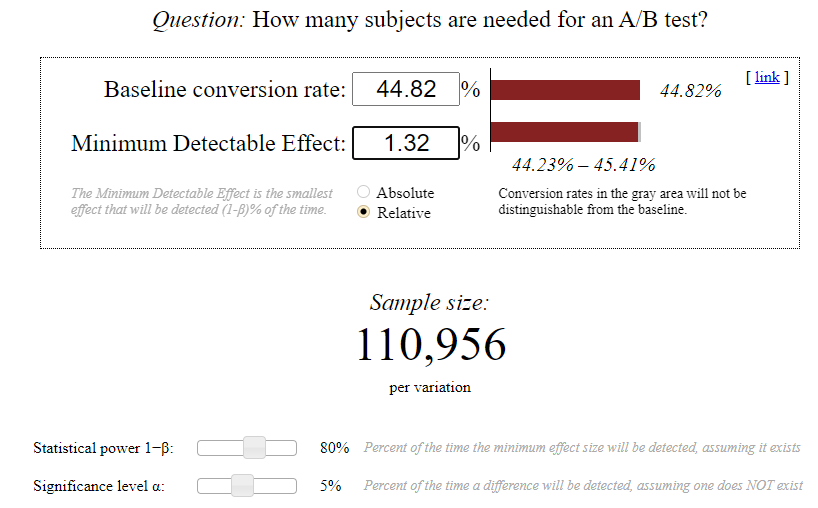

> Согласно этому калькулятору, чтобы зафиксировать наблюдаемый эффект разницы процента удержания в контрольной и тестовой группах, нам необходима выборка в 110тыс. игроков для каждой группы. У нас же выборка более чем в два раза меньше для однодневного теста.

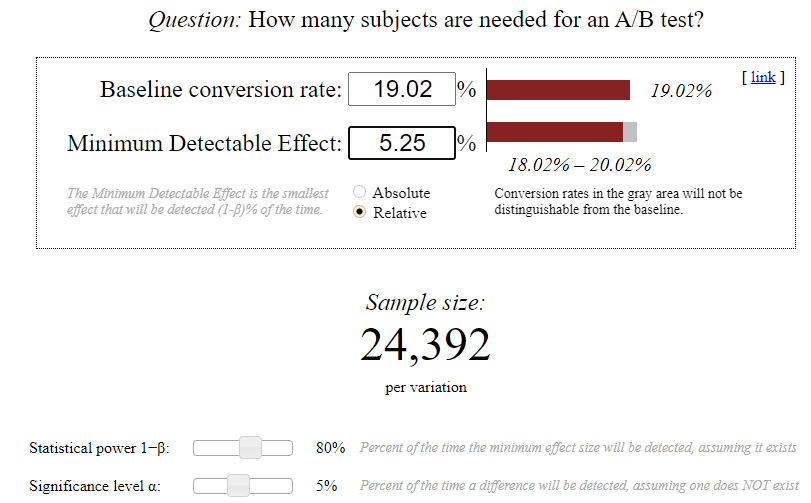

> Для 7-ми дневного теста для наблюдаемого эффекта необходима выборка в 24 тыс. игроков, у нас же почти в два раза больше.

> Непонятно что нам дает это сравнение в калькуляторе для поиска выборок; наверное то, что держать тест один день недостаточно.

In [20]:
z_score_1, z_pvalue_1 = proportion.proportions_ztest(np.array([a_1, b_1]), np.array([n_a, n_b]))
z_score_1, z_pvalue_1

(1.7840862247974725, 0.07440965529691913)

In [22]:
chisq_1, pvalue_1, table = proportion.proportions_chisquare(np.array([a_1, b_1]), np.array([n_a, n_b]))
chisq_1, pvalue_1

(3.182963657512031, 0.07440965529692188)

> После однодневного теста p-value > 0.05, значит мы не отвергаем нулевую гипотезу и считаем что стат. значимых различий нет между версиями на каком уровне разместить ворота на 30-ом или 40-ом.

In [23]:
z_score_7, z_pvalue_7 = proportion.proportions_ztest(np.array([a_7, b_7]), np.array([n_a, n_b]))
z_score_7, z_pvalue_7

(3.164358912748191, 0.001554249975614329)

In [24]:
chisq_7, pvalue_7, table = proportion.proportions_chisquare(np.array([a_7, b_7]), np.array([n_a, n_b]))
chisq_7, pvalue_7

(10.01316732868897, 0.0015542499756142788)

> После 7-ми дней проведения теста p-value < 0.05, мы видим что между контрольной и тестовой группой есть стат. значимые различия. Значит перенос ворот на 40й уровень повлиял на метрику удержания. Но так как она уменьшилась, а после однодневного теста различий не было найдено, то мы не будем рекомендовать переносить ворота с 30го на 40й уровень.